<a href="https://colab.research.google.com/github/tolgaenginn/Binary-Search/blob/main/erg6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ydata-profiling


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)


#QUESTION 1

In [ ]:
df = pd.read_csv("bankloan.csv")

profile = ProfileReport(df, title="Pandas Profiling Report")

profile

#QUESTION 2

In [ ]:
#min max etc
mean_loan = df['loan_amnt'].mean()
min_loan = df['loan_amnt'].min()
max_loan = df['loan_amnt'].max()

print("Mean loan_amnt:", mean_loan)
print("Min loan_amnt:", min_loan)
print("Max loan_amnt:", max_loan)

#remove columns
cols_to_drop = [
    "id", "member_id", "url", "policy_code",
    "grade", "sub_grade", "loan_status",
    "pymnt_plan", "initial_list_status",
    "emp_title", "title", "zip_code"
]

cols_to_drop = [c for c in cols_to_drop if c in df.columns]
df = df.drop(columns=cols_to_drop)

print("Dropped columns:", cols_to_drop)


# fill missing values
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


df_processed = pd.get_dummies(df, drop_first=True)

print("Shape after preprocessing:", df_processed.shape)

#A B1 B2
df_raw = pd.read_csv("bankloan.csv")

approved_grades = ["A", "B1", "B2"]

df_processed["approved"] = df_raw["grade"].apply(lambda x: 1 if x in approved_grades else 0)

print("\nDistribution of target variable (approved vs nonapproved):")
print(df_processed["approved"].value_counts(normalize=True))


#5
threshold = 0.15

df_raw["loan_amnt_bin"] = pd.cut(df_raw["loan_amnt"], bins=20)

approval_rates = df_raw.groupby("loan_amnt_bin")["grade"].apply(
    lambda x: (x.isin(approved_grades).mean())
)

print("\nApproval rate per loan amount range:")
print(approval_rates)

valid_ranges = approval_rates[approval_rates >= threshold]

print("\nLoan ranges with approval probability >= {:.0f}%:".format(threshold*100))
print(valid_ranges)

Mean loan_amnt: 14916.799893418598
Min loan_amnt: 1000
Max loan_amnt: 35000
Dropped columns: ['id', 'member_id', 'grade', 'sub_grade', 'loan_status', 'initial_list_status', 'emp_title', 'title']
Shape after preprocessing: (11259, 608)

Distribution of target variable (approved vs nonapproved):
approved
0    0.861
1    0.139
Name: proportion, dtype: float64

Approval rate per loan amount range:
loan_amnt_bin
(966.0, 2700.0]       0.075230
(2700.0, 4400.0]      0.103602
(4400.0, 6100.0]      0.187551
(6100.0, 7800.0]      0.192855
(7800.0, 9500.0]      0.208629
(9500.0, 11200.0]     0.194543
(11200.0, 12900.0]    0.177940
(12900.0, 14600.0]    0.166094
(14600.0, 16300.0]    0.192003
(16300.0, 18000.0]    0.170624
(18000.0, 19700.0]    0.118112
(19700.0, 21400.0]    0.170093
(21400.0, 23100.0]    0.142857
(23100.0, 24800.0]    0.172012
(24800.0, 26500.0]    0.259571
(26500.0, 28200.0]    0.315926
(28200.0, 29900.0]    0.130556
(29900.0, 31600.0]    0.083770
(31600.0, 33300.0]    0.054945


/tmp/ipython-input-1639547047.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_rates = df_raw.groupby("loan_amnt_bin")["grade"].apply(


#QUESTION 3

In [ ]:

df = df_processed.copy()


# fixing leftover NaNs after preprocessing
df = df.fillna(df.median(numeric_only=True))
df = df.fillna(0)

X = df.drop(columns=["approved"])
y = df["approved"]

# 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.30, random_state=42, stratify=y
)

#3
log_clf = LogisticRegression(max_iter=2000)
log_clf.fit(X_train, y_train)

#4
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    print(f"\n----- {name} -----")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))

evaluate_model(log_clf, "Logistic Regression")


----- Logistic Regression -----
Accuracy : 0.9828300769686205
Precision: 0.9345991561181435
Recall   : 0.9425531914893617
F1 Score : 0.9385593220338984


#QUESTION 4


Top 15 important features:

int_rate            0.480954
total_rev_hi_lim    0.035947
revol_util          0.032076
term_ 60 months     0.027335
annual_inc          0.021975
dti                 0.021711
installment         0.019980
out_prncp           0.019802
tot_cur_bal         0.019374
revol_bal           0.018875
total_rec_int       0.016653
loan_amnt           0.015623
funded_amnt         0.015458
total_acc           0.014636
total_rec_prncp     0.014185
dtype: float64


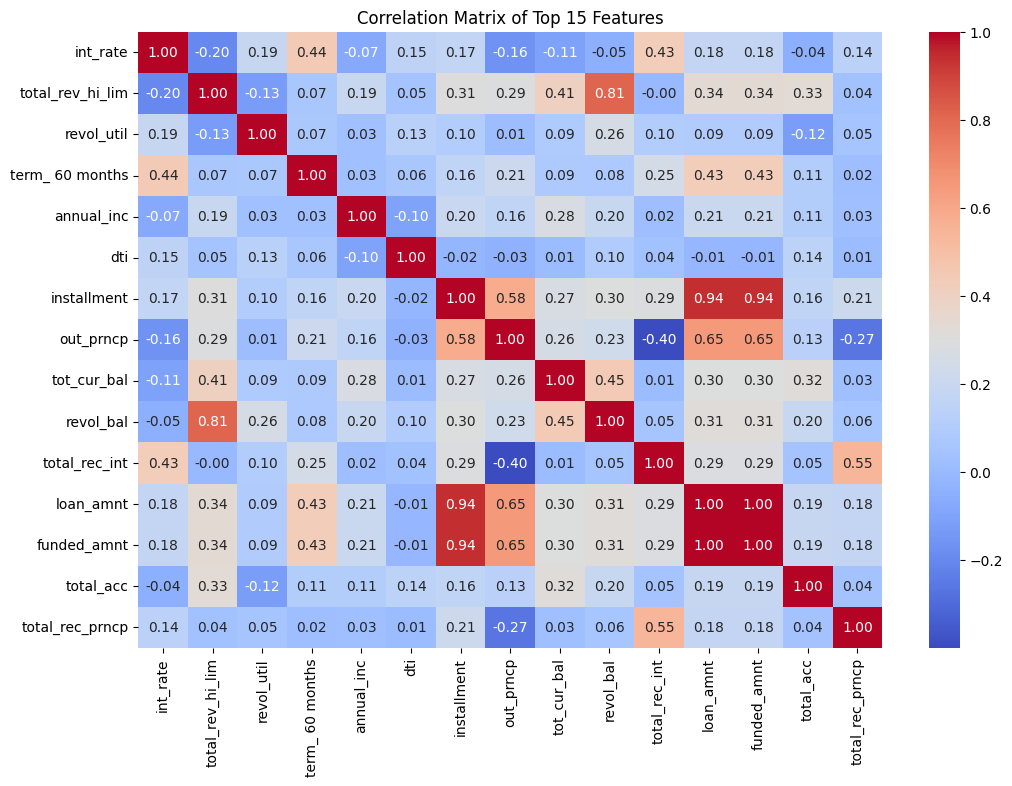


Highly correlated features to REMOVE:

{'funded_amnt', 'loan_amnt', 'revol_bal'}

Selected low-correlation features:

['int_rate', 'total_rev_hi_lim', 'revol_util', 'term_ 60 months', 'annual_inc', 'dti', 'installment', 'out_prncp', 'tot_cur_bal', 'total_rec_int', 'total_acc', 'total_rec_prncp']


In [ ]:
# RFC
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

# 2
feature_importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

top15 = feature_importances.head(15)
print("\nTop 15 important features:\n")
print(top15)

# 3
df_top15 = df[top15.index]
corr_matrix = df_top15.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Top 15 Features")
plt.show()

# 4
threshold = 0.80

corr_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)

print("\nHighly correlated features to REMOVE:\n")
print(corr_features)

selected_features = [col for col in top15.index if col not in corr_features]

print("\nSelected low-correlation features:\n")
print(selected_features)

df_reduced = df[selected_features + ["approved"]]


#QUESTION 5

PCA explained variance (300 components): 0.9381222310861614
KNN Accuracy for k=5: 0.9486428571428571
KNN Accuracy for k=15: 0.9400714285714286
KNN Accuracy for k=51: 0.9225714285714286
KNN Accuracy for k=101: 0.9107857142857143


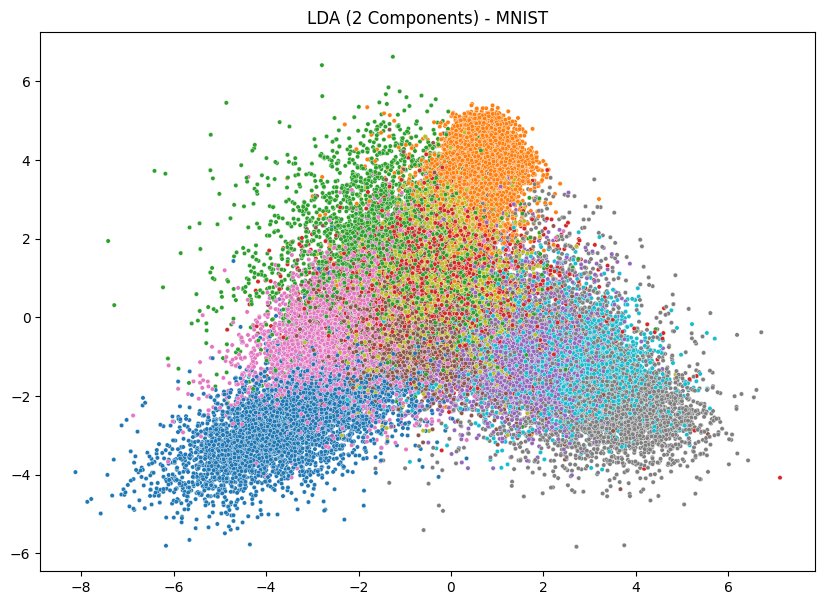

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


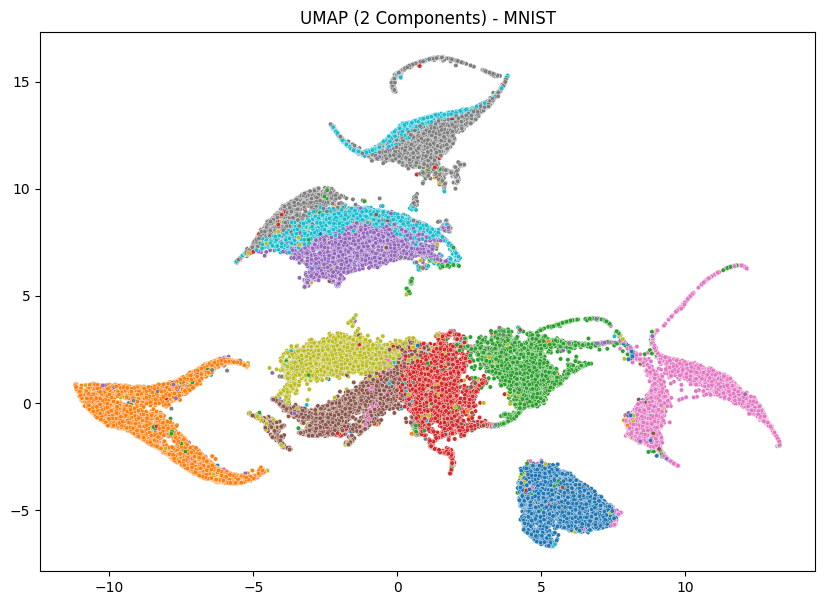

In [ ]:

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data
y = mnist.target.astype(int)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#3
pca = PCA(n_components=300)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("PCA explained variance (300 components):",
      np.sum(pca.explained_variance_ratio_))

ks = [5, 15, 51, 101]
accuracies = {}

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    accuracies[k] = acc
    print(f"KNN Accuracy for k={k}: {acc}")

#4
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_train_lda[:,0], y=X_train_lda[:,1], hue=y_train, palette="tab10", s=10)
plt.title("LDA (2 Components) - MNIST")
plt.legend([],[], frameon=False)
plt.show()

#5
!pip install umap-learn
import umap

umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_train_umap = umap_reducer.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_train_umap[:,0], y=X_train_umap[:,1], hue=y_train, palette="tab10", s=10)
plt.title("UMAP (2 Components) - MNIST")
plt.legend([],[], frameon=False)
plt.show()
